In [ ]:
"""
*CustomerID** - 고객들에게 배정된 유니크한 고객 번호 입니다. 
*Gender** - 고객의 성별 입니다. 
*Age** - 고객의 나이 입니다. 
*Annual Income (k$)** - 고객의 연소득 입니다. 
**Spending Score (1-100)** - 고객의 구매행위와 구매 특성을 바탕으로 mall에서 할당한 고객의 지불 점수 입니다. 
"""

In [1]:
#데이터 탐색

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# 기술통계를 확인합니다. 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

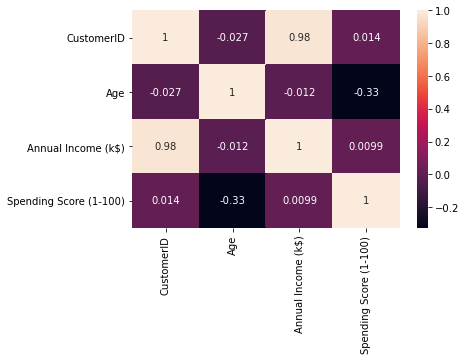

In [7]:
# 변수간의 correlation을 확인합니다. 
corr = df.corr()
sns.heatmap(corr, annot=True)

In [8]:
# 컬럼명 
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

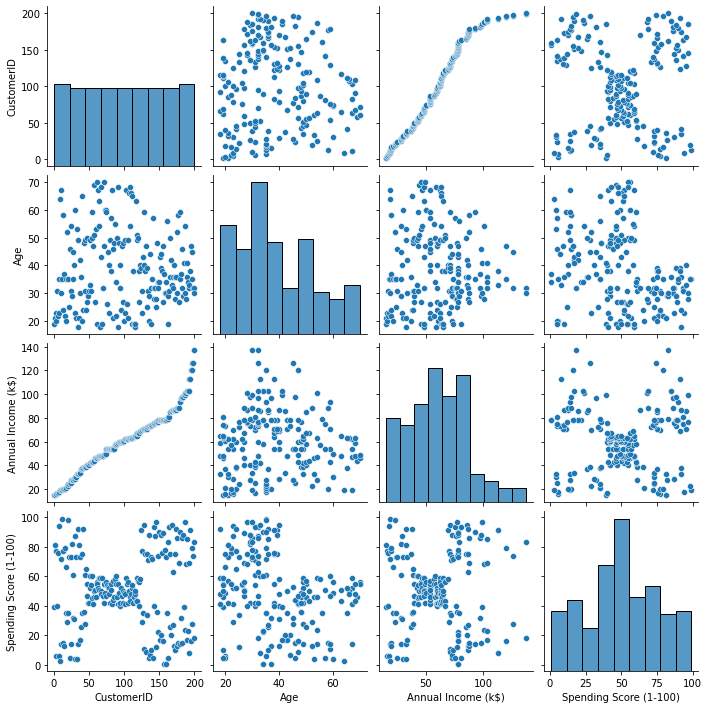

In [9]:
# 변수간의 pairplot을 그려봅니다. 
sns.pairplot(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

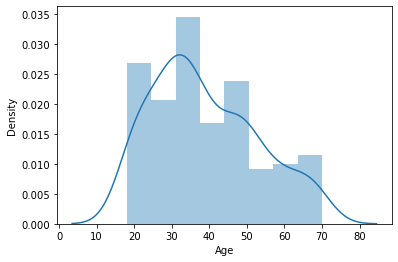

In [12]:
# 각 변수의 분포를 봅니다. 
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

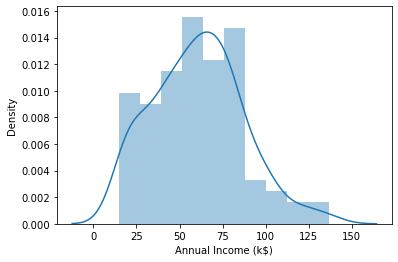

In [13]:
sns.distplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

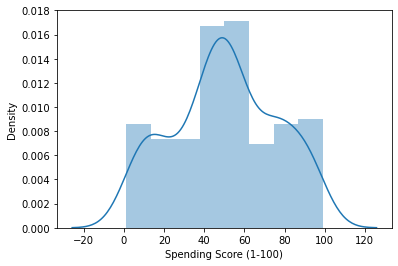

In [14]:
sns.distplot(df['Spending Score (1-100)'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

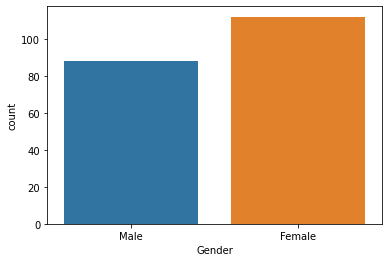

In [15]:
sns.countplot(data=df, x = "Gender")

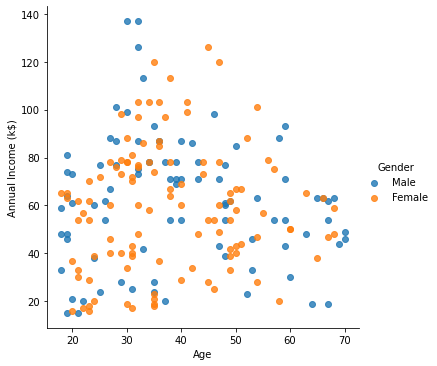

In [16]:
# 성별에 따른 분포도 확인해봅니다. 
sns.lmplot(data=df, x="Age", y = "Annual Income (k$)", hue = "Gender", fit_reg=False)

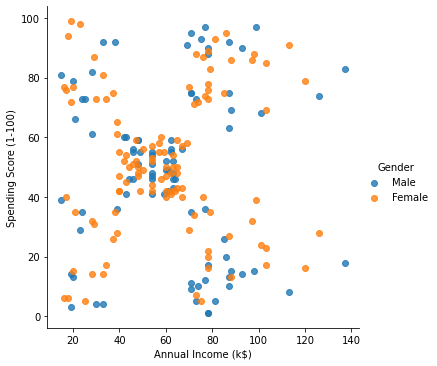

In [17]:
sns.lmplot(data=df, x="Annual Income (k$)", y = 'Spending Score (1-100)', hue = "Gender", fit_reg=False)

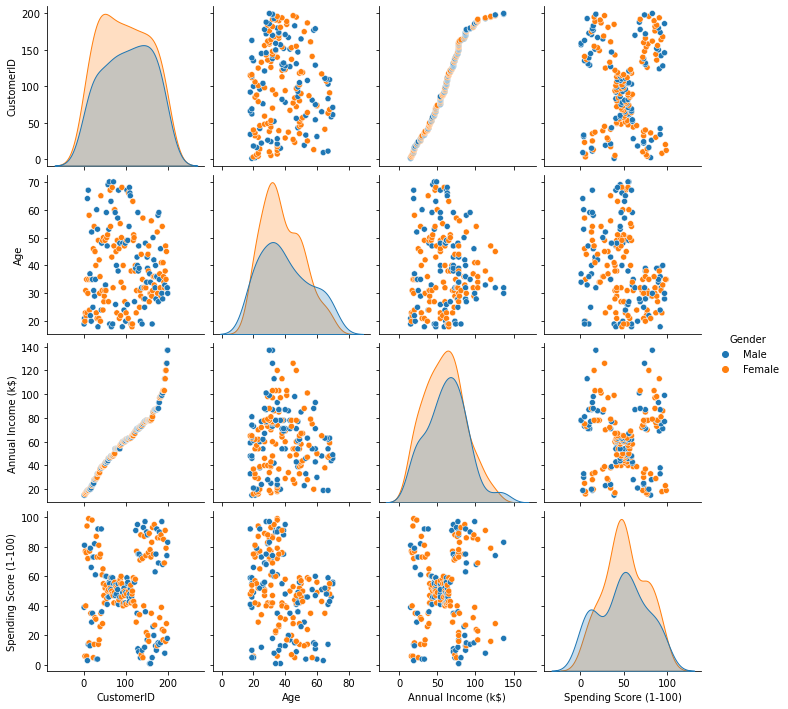

In [18]:
sns.pairplot(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']], hue = 'Gender')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

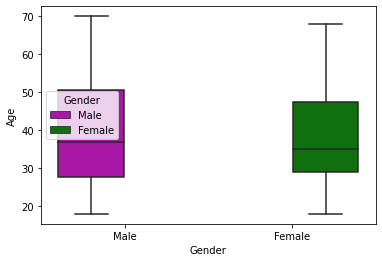

In [19]:
sns.boxplot(x="Gender", y='Age',
           hue="Gender", palette=["m", "g"],
           data=df)

In [ ]:
# K-means를 사용한 클러스터링

#Age & spending Score 두 가지 변수를 사용한 클러스터링 

In [20]:
from sklearn.cluster import KMeans

# X1에 'Age' , 'Spending Score (1-100)'의 값을 넣어줍니다.  
X1 = df[['Age' , 'Spending Score (1-100)']].values

# inertia 라는 빈 리스트를 만들어줍니다. 
inertia = []

# 군집수 n을 1에서 11까지 돌아가며 X1에 대해 k-means++ 알고리즘을 적용하여 inertia를 리스트에 저장합니다. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [ ]:
# k-means 파라미터 설정이 복잡하다면 아래와 같이 실행해도 거의 동일한 결과가 나옴

'''
from sklearn.cluster import KMeans

# X1에 'Age' , 'Spending Score (1-100)'의 값을 넣어줍니다.  
X1 = df[['Age' , 'Spending Score (1-100)']].values

# inertia 라는 빈 리스트를 만들어줍니다. 
inertia = []

# 군집수 n을 1에서 11까지 돌아가며 X1에 대해 k-means++ 알고리즘을 적용하여 inertia를 리스트에 저장합니다. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
'''

In [21]:
inertia

[171535.5,
 75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23839.43963317384,
 19576.013221355326,
 15514.193134351031,
 13020.333585858585,
 11480.045478271728,
 10187.846101364523]

In [ ]:
# Inertia value를 이용한 적정 k 선택 

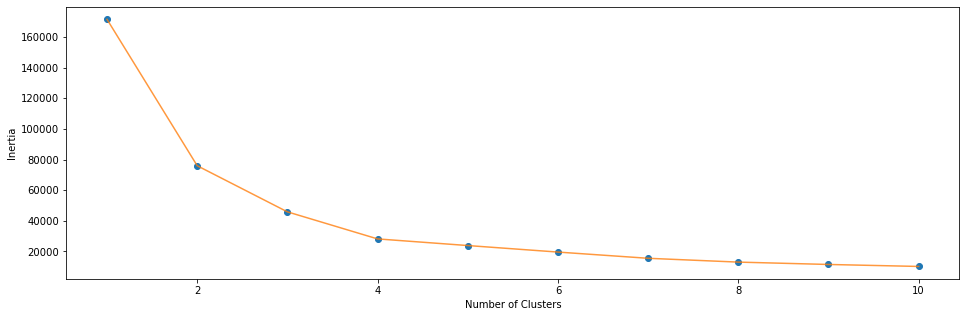

In [22]:
plt.figure(1 , figsize = (16 ,5))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.8)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# k의 개수는 4개가 적정

In [23]:
# 군집수를 4로 지정하여 시각화 해봅니다. 
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

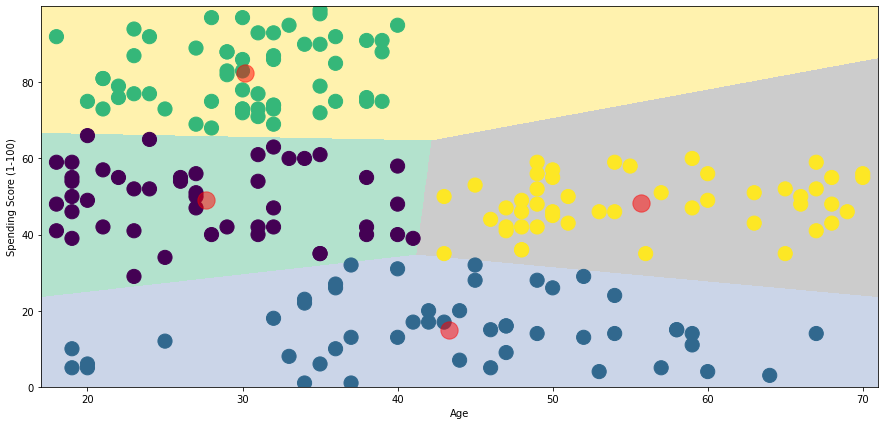

In [24]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [ ]:
"""
* 연령-소비점수를 활용한 군집 4개는 아래와 같이 명명할 수 있습니다. 
  * 저연령-고소비 군 
  * 저연령-중소비 군
  * 고연령-중소비 군
  * 저소비 군

* 군집별 활용 전략 예시
  * 이 수퍼마켓 mall의 경우 소비점수가 높은 고객들은 모두 40세 이하의 젊은 고객입니다.
  * 소비점수가 높은 고객들은 연령대가 비슷한 만큼 비슷한 구매패턴과 취향을 가질 가능성이 높습니다. 
  * 해당 군집의 소비자 특성을 더 분석해본 뒤 해당 군집의 소비자 대상 VIP 전략을 수립해봅니다.
  * 소비점수가 중간정도인 고객들에게는 연령에 따라 두 개 집단으로 나눠서 접근해봅니다. 
  * 소비점수가 낮은 고객군은 연령대별로 중소비점수 군집에 편입될 수 있도록 접근해봅니다.   
"""

In [ ]:
### 'Annual Income (k$)' , 'Spending Score (1-100)' 두 가지 변수를 사용한 클러스터링 

In [25]:
from sklearn.cluster import KMeans

# X1에 'Age' , 'Spending Score (1-100)'의 값을 넣어줍니다.  
X1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].values

# inertia 라는 빈 리스트를 만들어줍니다. 
inertia = []

# 군집수 n을 1에서 11까지 돌아가며 X1에 대해 k-means++ 알고리즘을 적용하여 inertia를 리스트에 저장합니다. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

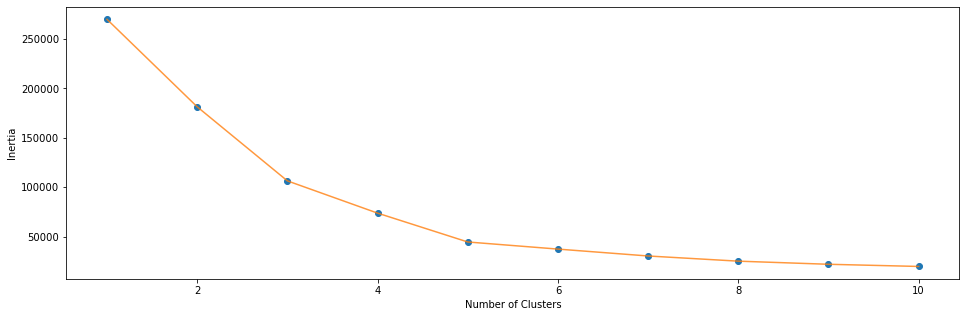

In [26]:
plt.figure(1 , figsize = (16 ,5))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.8)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [27]:
# 군집수를 5로 지정하여 시각화 해봅니다. 
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

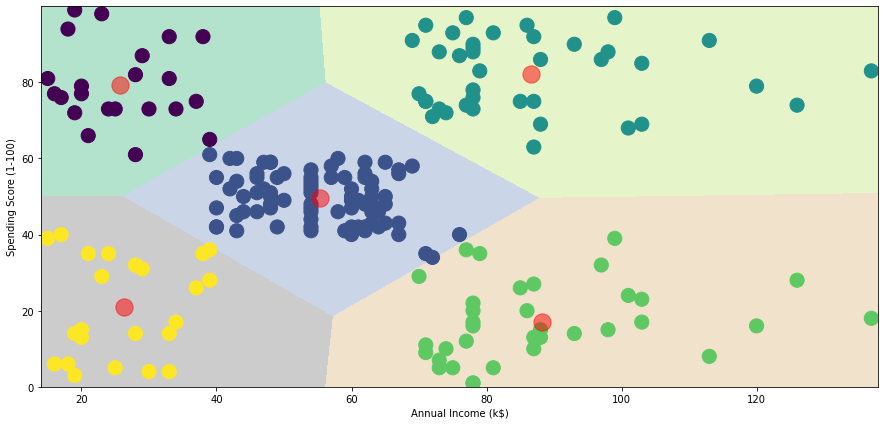

In [29]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [ ]:
"""
### 실루엣 스코어를 사용한 k 선택 

* 실루엣 스코어 
  * Silhouette Coefficient는 각 샘플의 클러스터 내부 거리의 평균 (a)와 인접 클러스터와의 거리 평균 (b)을 사용하여 계산합니다. 
  * 한 샘플의 Silhouette Coefficient는 (b - a) / max(a, b)입니다.
  * 가장 좋은 값은 1이고 최악의 값은 -1입니다. 
  * 0 근처의 값은 클러스터가 오버랩되었다는 것을 의미합니다
  * 음수 값은 샘플이 잘못된 클러스터에 배정되었다는 것을 의미합니다. 다른 클러스터가 더 유사한 군집이라는 의미입니다. 

"""

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.293166070535953
For n_clusters = 3 The average silhouette_score is : 0.3839349967742105
For n_clusters = 4 The average silhouette_score is : 0.40546302077733304
For n_clusters = 5 The average silhouette_score is : 0.44428597560893024
For n_clusters = 6 The average silhouette_score is : 0.4523443947724053
For n_clusters = 7 The average silhouette_score is : 0.4398198217929885
For n_clusters = 8 The average silhouette_score is : 0.4352315435135759


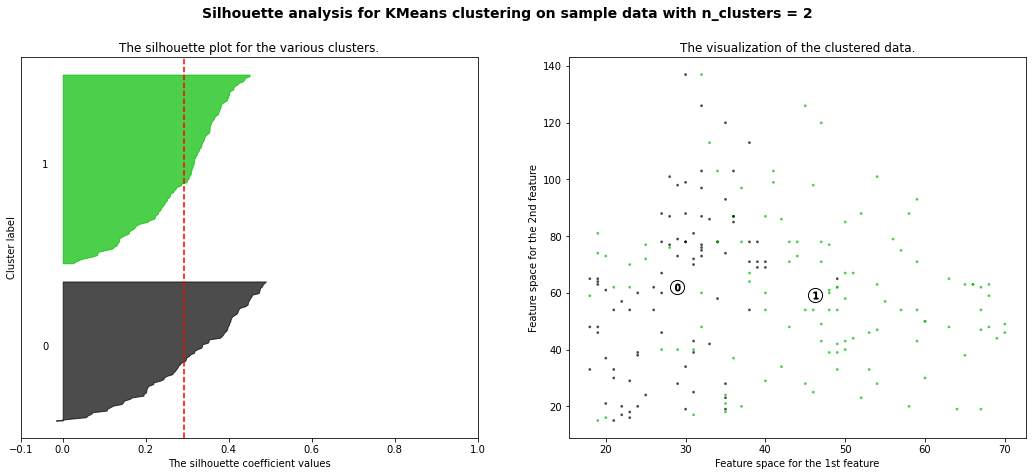

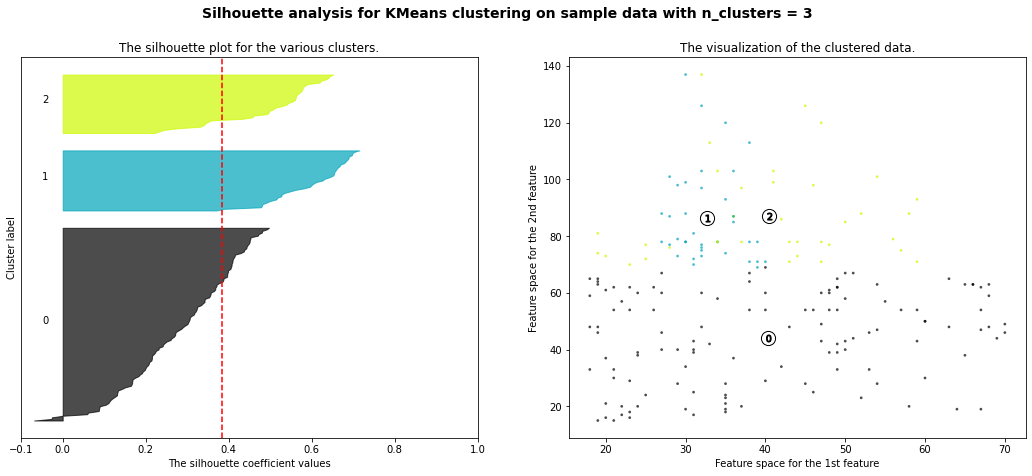

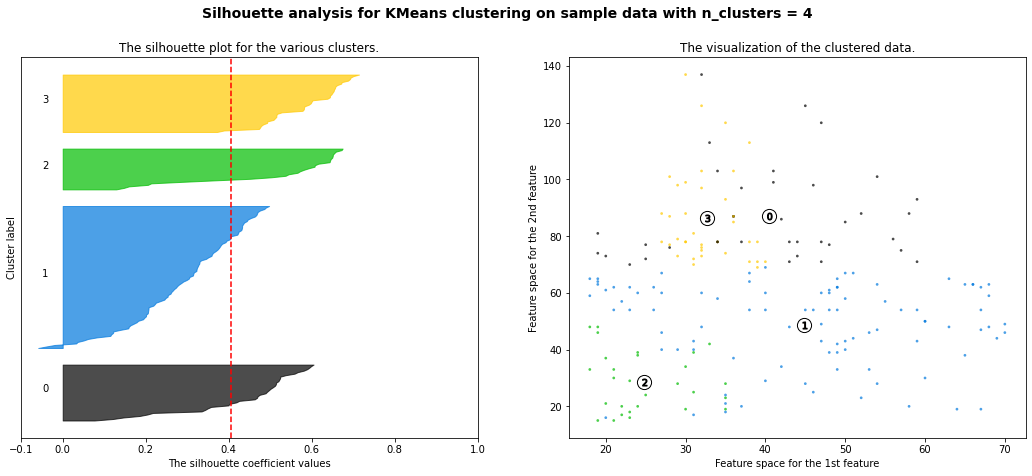

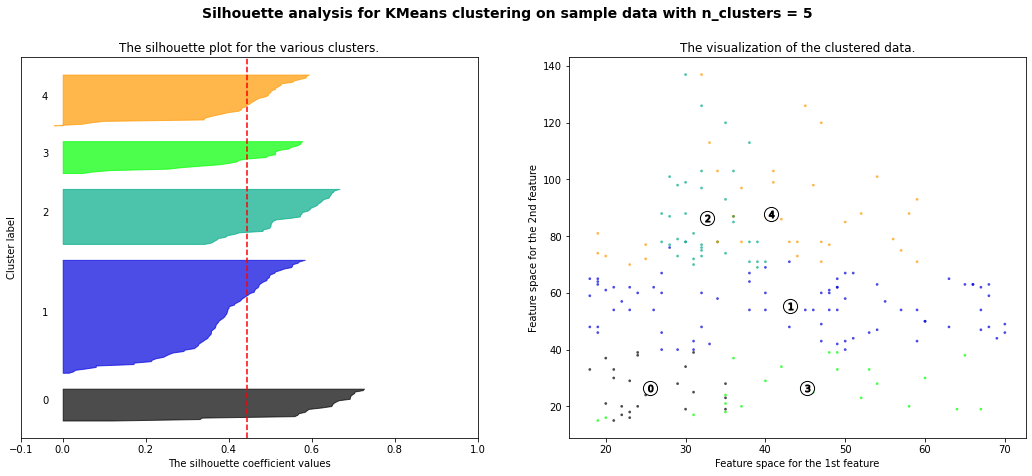

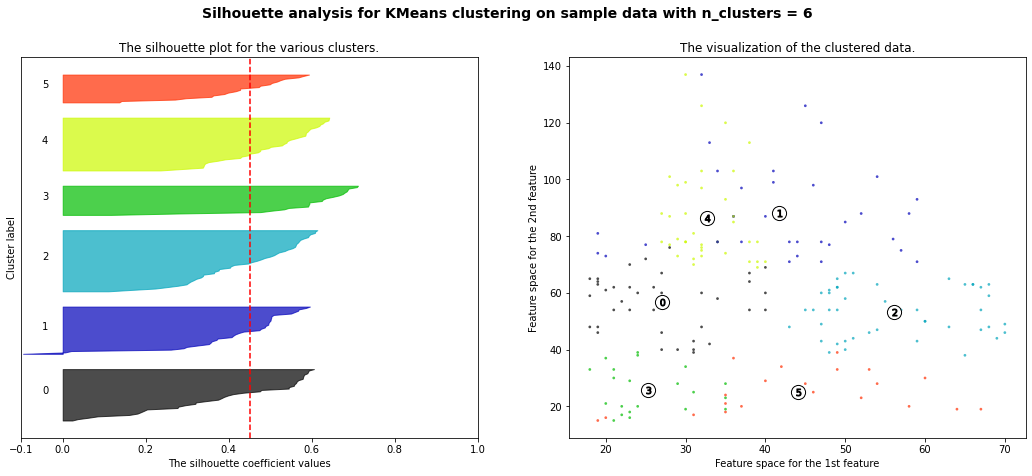

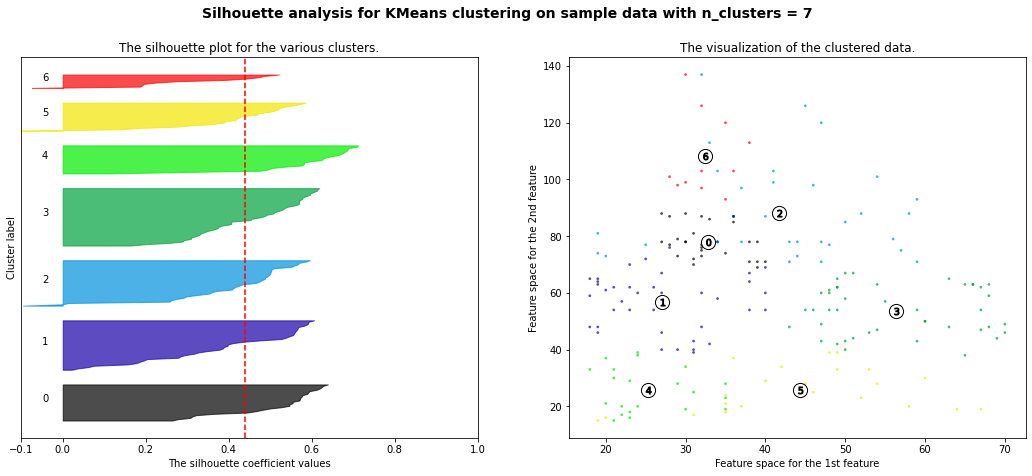

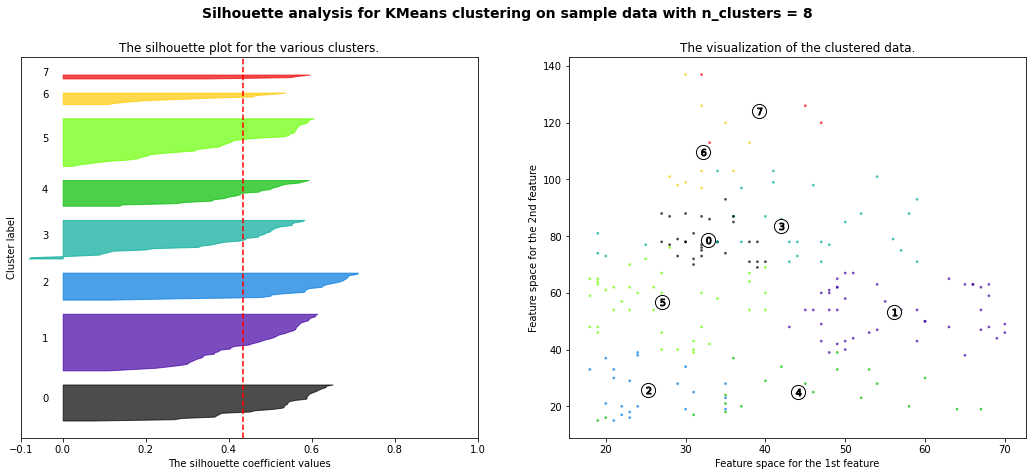

In [31]:
# 클러스터의 갯수 리스트를 만들어줍니다. 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# 사용할 컬럼 값을 지정해줍니다. 
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values


for n_clusters in range_n_clusters:
    # 1 X 2 의 서브플롯을 만듭니다. 
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 첫 번째 서브플롯은 실루엣 플롯입니다. 
    # silhouette coefficient는 -1에서 1 사이의 값을 가집니다.
    # 하지만 시각화에서는 -0.1에서 1사이로 지정해줍니다. 
    ax1.set_xlim([-0.1, 1])

    # clusterer를 n_clusters 값으로 초기화 해줍니다.  
    # 재현성을 위해 random seed를 10으로 지정 합니다.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # silhouette_score는 모든 샘플에 대한 평균값을 제공합니다. 
    # 실루엣 스코어는 형성된 군집에 대해 밀도(density)와 분리(seperation)에 대해 견해를 제공합니다. 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # 각 샘플에 대한 실루엣 스코어를 계산합니다. 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 클러스터 i에 속한 샘플들의 실루엣 스코어를 취합하여 정렬합니다. 
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # 각 클러스터의 이름을 달아서 실루엣 플롯의 Label을 지정해줍니다. 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 플롯을 위한 새로운 y_lower를 계산합니다.
        y_lower = y_upper + 10  # 10 for the 0 samples






    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 모든 값에 대한 실루엣 스코어의 평균을 수직선으로 그려줍니다. 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # yaxis labels / ticks 를 지워줍니다. 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 두 번째 플롯이 실제 클러스터가 어떻게 형성되었는지 시각화 합니다. 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 클러스터의 이름을 지어줍니다. 
    centers = clusterer.cluster_centers_
    # 클러스터의 중앙에 하얀 동그라미를 그려줍니다. 
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
#클러스터의 개수는 6개가 가장 적절합니다. 

For n_clusters = 6 The average silhouette_score is : 0.4523443947724053


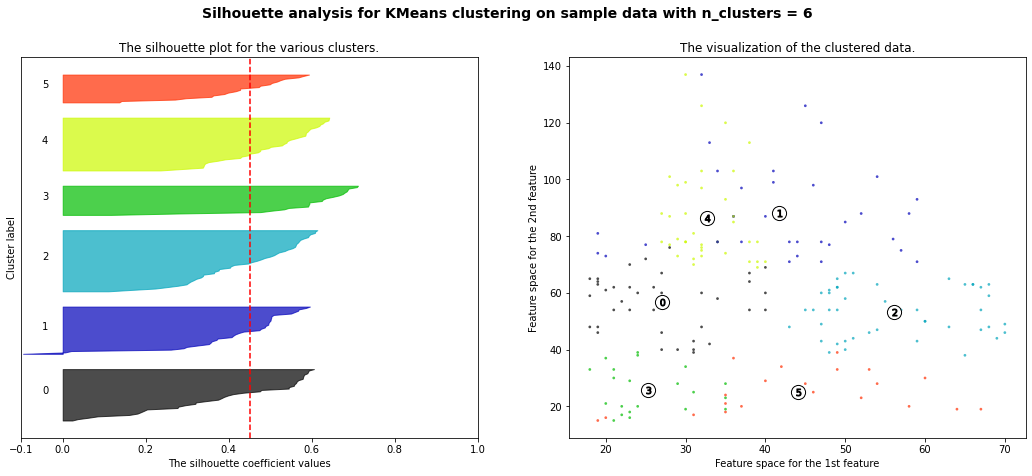

In [32]:
# 클러스터의 갯수 리스트를 만들어줍니다. 
range_n_clusters = [6]

# 사용할 컬럼 값을 지정해줍니다. 
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values


for n_clusters in range_n_clusters:
    # 1 X 2 의 서브플롯을 만듭니다. 
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 첫 번째 서브플롯은 실루엣 플롯입니다. 
    # silhouette coefficient는 -1에서 1 사이의 값을 가집니다.
    # 하지만 시각화에서는 -0.1에서 1사이로 지정해줍니다. 
    ax1.set_xlim([-0.1, 1])

    # clusterer를 n_clusters 값으로 초기화 해줍니다.  
    # 재현성을 위해 random seed를 10으로 지정 합니다.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # silhouette_score는 모든 샘플에 대한 평균값을 제공합니다. 
    # 실루엣 스코어는 형성된 군집에 대해 밀도(density)와 분리(seperation)에 대해 견해를 제공합니다. 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # 각 샘플에 대한 실루엣 스코어를 계산합니다. 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 클러스터 i에 속한 샘플들의 실루엣 스코어를 취합하여 정렬합니다. 
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # 각 클러스터의 이름을 달아서 실루엣 플롯의 Label을 지정해줍니다. 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 플롯을 위한 새로운 y_lower를 계산합니다.
        y_lower = y_upper + 10  # 10 for the 0 samples






    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 모든 값에 대한 실루엣 스코어의 평균을 수직선으로 그려줍니다. 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # yaxis labels / ticks 를 지워줍니다. 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 두 번째 플롯이 실제 클러스터가 어떻게 형성되었는지 시각화 합니다. 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 클러스터의 이름을 지어줍니다. 
    centers = clusterer.cluster_centers_
    # 클러스터의 중앙에 하얀 동그라미를 그려줍니다. 
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [33]:
# 기존 데이터셋에 각 고객이 속한 클러스터 값을 넣어줍니다. 
df["cluster"] = cluster_labels
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,3
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [34]:
# 각 그룹의 특성을 확인합니다. 
df.groupby("cluster")["Age"].mean()

cluster
0    27.000000
1    41.685714
2    56.155556
3    25.272727
4    32.692308
5    44.142857
Name: Age, dtype: float64

<AxesSubplot:xlabel='cluster', ylabel='Age'>

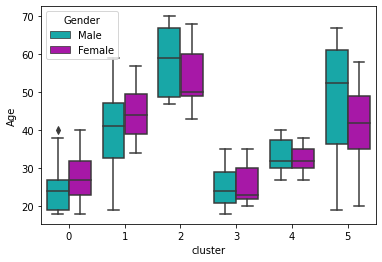

In [35]:
sns.boxplot(x='cluster', y="Age", hue="Gender", palette=["c", "m"], data=df)

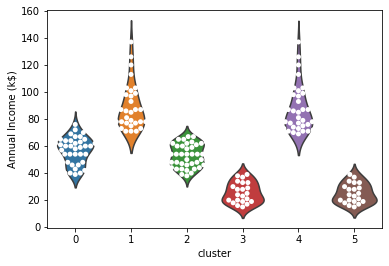

In [36]:
ax = sns.violinplot(x="cluster", y='Annual Income (k$)', data=df, inner=None)
ax = sns.swarmplot(x="cluster", y='Annual Income (k$)', data=df,
                   color="white", edgecolor="gray")

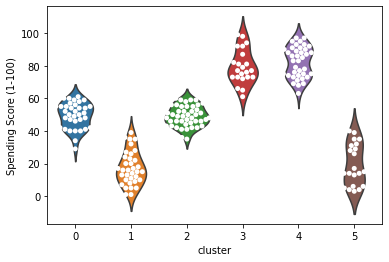

In [37]:
ax = sns.violinplot(x="cluster", y='Spending Score (1-100)', data=df, inner=None)
ax = sns.swarmplot(x="cluster", y='Spending Score (1-100)', data=df,
                   color="white", edgecolor="gray")

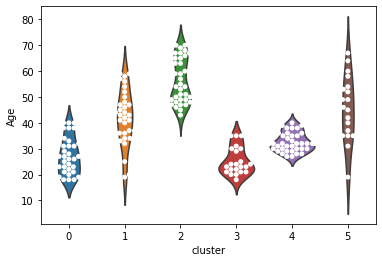

In [38]:
ax = sns.violinplot(x="cluster", y='Age', data=df, inner=None)
ax = sns.swarmplot(x="cluster", y='Age', data=df,
                   color="white", edgecolor="gray")

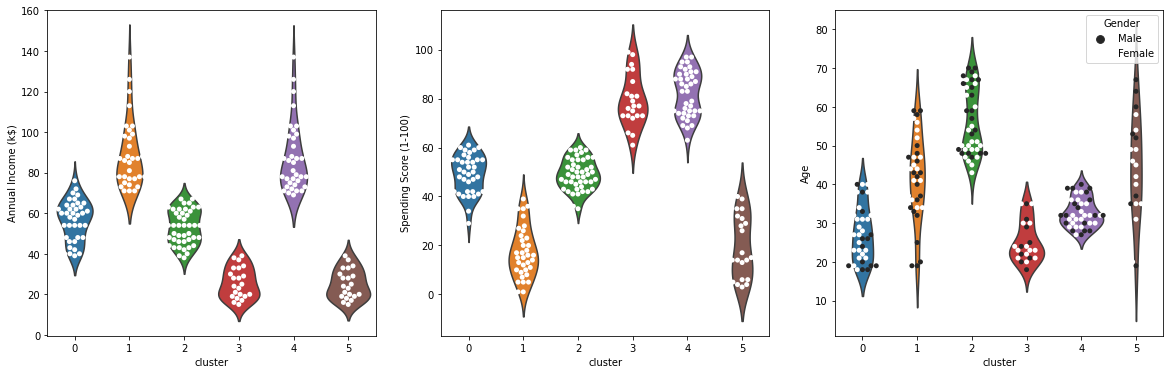

In [40]:
# 3개의 시각화를 한 화면에 배치합니다. 
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3)

# 시각화의 사이즈를 설정해줍니다. 
figure.set_size_inches(20, 6)

# 클러스터별로 swarmplot을 시각화해봅니다. 
ax1 = sns.violinplot(x="cluster", y='Annual Income (k$)', data=df, inner=None, ax=ax1)
ax1 = sns.swarmplot(x="cluster", y='Annual Income (k$)', data=df,
                   color="white", edgecolor="gray", ax=ax1)

ax2 = sns.violinplot(x="cluster", y='Spending Score (1-100)', data=df, inner=None, ax=ax2)
ax2 = sns.swarmplot(x="cluster", y='Spending Score (1-100)', data=df,
                   color="white", edgecolor="gray", ax=ax2)

ax3 = sns.violinplot(x="cluster", y='Age', data=df, inner=None, ax=ax3)
ax3 = sns.swarmplot(x="cluster", y='Age', data=df,
                   color="white", edgecolor="gray", ax=ax3, hue="Gender")


In [ ]:
* VIP 고객 : 군집 1, 군집 4 
  - 소비 점수가 높은 군집은 1, 4입니다. 
  - 군집1 
    * 그 중에서도 1의 연간소득은 높은편입니다. 
    * 잘 유도할 경우 더 많은 지출을 하게 될지도 모르겠습니다. 
    * 1의 연령대는 20대후반에서 40대 초반으로 젊은편입니다. 
    * 1의 세부 고객 정보를 더 분석해서 타겟 마케팅을 기획해 봅니다. 
    * 고소득 젊은층이 선호할 이벤트를 기획하거나 사은품을 기획해 볼 수 있을것입니다. 
  - 군집4 
    * 연간 소득은 낮은편이지만 우리 mall에서의 소비점수는 높은편입니다.
    * 특히 우리 mall에 대한 충성도가 높고 구매비율이 높은 고객군으로 추정됩니다. 
    * 가격적인 혜택을 추가 제공하는 것을 고려해봅니다. (할인쿠폰, 멤버십 등)  

* 잠재 VIP 고객 : 군집 2
  - 연간소득은 높지만 소비 점수는 낮은 편입니다. 
  - 우리 mall에서 구매를 더 할 수 있는 여력이 있는 고객군입니다. 
  - 연령은 전 연령대에 걸쳐 있습니다. 
  - 다른 변수를 더 확보하여 잠재 VIP 고객이 될 수 있는 cluster 2 고객의 방문과 구매를 유도해봅니다. 
  - 재방문시 사은품 증정, 특정 금액 이상 구매시 혜택 제공 등 재방문과 구매를 유도해봅니다. 